In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import plot_roc_curve

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.decomposition import NMF, PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.cluster import DBSCAN

from sklearn import (
    cluster, decomposition, ensemble, manifold, 
    random_projection, preprocessing)
from sklearn.utils.class_weight import compute_class_weight

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# from sklearn.neighbors import KNeighborsRegressor

import pickle

## Functions

In [32]:
def get_scores(model, X_train, X_test, y_train, y_test, **kwargs):
    model = model(**kwargs)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return model.score(X_test, y_test), \
           precision_score(y_test, y_predict), \
           recall_score(y_test, y_predict)

def tokenize(doc):
    '''
    INPUT: string
    OUTPUT: list of strings

    Tokenize and stem/lemmatize the document.
    '''
    return [port.stem(w) for w in word_tokenize(doc.lower())]

In [33]:
df = pd.read_csv('../../sample_df.csv')

In [34]:
# sample_df1.columns
# df['liked'] = (df.likes > 20)*1

In [35]:
# sample_df.drop(['Unnamed: 0','created'], axis = 1, inplace = True)
# sample_df = sample_df1[['parent_id', 'created_time']]

In [36]:
y = df.pop('rating')

In [37]:
text = df.pop('text')

In [38]:
X = df.values

In [8]:
#Not Text Data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

In [9]:
# yt_pred = model.predict(X_train)
# train_score = model.score(X_train, y_train)
# test_score = model.score(X_test, y_test)

# # y_pred = model.predict(X_test)
# # test_score = r2_score(y_test, y_pred)
# # #overfit my model?
# # train_score, test_score
# len(model.feature_importances_)

In [10]:
# plot_roc_curve(model, X_test, y_test)


In [11]:
#Get varying acc prec recall
# get_scores(RandomForestClassifier, X_train, X_test, y_train, y_test, max_features = 5)

In [35]:
#find the right num features
# num_features = range(1, 10)
# accuracies = []

# for n in num_features:
#     tot = 0
#     for i in range(5):
#         rf = RandomForestClassifier(max_features=n)
#         rf.fit(X_train, y_train)
#         tot += rf.score(X_test, y_test)
#     accuracies.append(tot / 5)
# fig, ax = plt.subplots()
# ax.plot(num_features, accuracies)
# ax.set_xlabel("Number of Features")
# ax.set_ylabel("Accuracy")
# ax.set_title('Accuracy vs Num Features')



In [211]:
# or train_index, test_index in skf.split(X, y):
# ...     print("TRAIN:", train_index, "TEST:", test_index)
# ...     X_train, X_test = X[train_index], X[test_index]
# ...     y_train, y_test = y[train_index], y[test_index]

# cv = StratifiedKFold(n_splits=6)
# classifier = RandomForestClassifier(max_features = 6)
# for train, test in cv.split(X, y):
#     classifier.fit(X[train], y[train])

In [210]:
# cv = StratifiedKFold(n_splits=6)
# classifier = RandomForestClassifier(max_features = 6)

# tprs = []
# aucs = []
# mean_fpr = np.linspace(0, 1, 100)

# fig, ax = plt.subplots()
# for i, (train, test) in enumerate(cv.split(X, y)):
#     classifier.fit(X[train], y[train])
#     viz = plot_roc_curve(classifier, X[test], y[test],
#                          name='ROC fold {}'.format(i),
#                          alpha=0.3, lw=1, ax=ax)
#     interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
#     interp_tpr[0] = 0.0
#     tprs.append(interp_tpr)
#     aucs.append(viz.roc_auc)

# ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#         label='Chance', alpha=.8)

# mean_tpr = np.mean(tprs, axis=0)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# std_auc = np.std(aucs)
# ax.plot(mean_fpr, mean_tpr, color='b',
#         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
#         lw=2, alpha=.8)

# std_tpr = np.std(tprs, axis=0)
# tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
# tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')

# ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
#        title="Receiver operating characteristic")
# ax.legend(loc="lower right")
# plt.show()

## Other Models

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = get_scores(LogisticRegression, X_train, X_test, y_train, y_test)
dt = get_scores(DecisionTreeClassifier, X_train, X_test, y_train, y_test)
nb = get_scores(MultinomialNB, X_train, X_test, y_train, y_test)

In [217]:
# lr
# nb
# dt

Store info for later
accuracy_score_rf = {'basic': [0.9999509659703835, 0.9775925471929394]}


## Add in the NLP

In [39]:
snowball = SnowballStemmer(language = 'english')
port = PorterStemmer()

# tokenized = [snowball.stem(w) for w in word_tokenize(X.lower())]

In [40]:
vectorizer = TfidfVectorizer(max_features=400, stop_words='english', analyzer='word', strip_accents='ascii',sublinear_tf = True)
# vectorizer = CountVectorizer(max_features=400, stop_words='english', analyzer='word', strip_accents='ascii')

In [41]:
# features = vectorizer.get_feature_names()
# np.unique(features)

In [15]:
(len(y)-sum(y))/len(y)

0.06832695294010181

In [42]:
# new_X = np.concatenate((X, vect), axis = 1)
X_train, X_test, y_train, y_test = train_test_split(text.values, y.values, stratify=y)

In [43]:
x_train = vectorizer.fit_transform(X_train).todense()
x_test = vectorizer.transform(X_test).todense()
features = vectorizer.get_feature_names()


## SAVE VECTORS OF TEXT FOR TENSORFLOW

In [69]:
# np.save('testx.npy', x_test)
# np.save('trainx.npy', x_train)
# np.save('testy.npy', y_test)
# np.save('trainy.npy', y_train)

In [61]:
# x_test[x_test != test_x]

In [44]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state  = 1,
                               max_depth = 4, 
                               n_estimators=500, 
                               class_weight = 'balanced',
                              max_features = 20)
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=20,
                       n_estimators=500, n_jobs=-1, random_state=1)

In [45]:
y_pred = model.predict(x_test)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)


# len(model.feature_importances_)
# plot_roc_curve(model, X_test, y_test)
test_score, \
    precision_score(y_test, y_pred), \
           recall_score(y_test, y_pred)

(0.5191323988573706, 0.9536096256684492, 0.5086099326179186)

In [46]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(1363, 694, 13783, 14266)

looking at likes greater than or less than median: 
test/train score
(0.5790918897715014, 0.5816621721010051)

looking at likes greater than or less than 20:
test/train score
(0.9830996044588277, 0.985878891885266)




# looking at rating as approved or rejected:

## Random Forest: AOC = 0.63
rf_class_rating = (0.931938216243149, 0.930877565933701) AOC = 0.63

a,p,r = (0.48771009101175844, 0.9555987334484743, 0.47281466975253694)

tn, fp, fn, tp = (1404, 617, 14806, 13279)


## Naive_bayes: AOC = 0.64
a,p,r = (0.9313425895170397, 0.9332867039701572, 0.9977212034894072)
a,p,r = ((0.8039925596226666, 0.9445691382765531,0.8391312088303364)


tn, fp, fn, tp = (18, 2003, 64, 28021)
tn, fp, fn, tp = (638, 1383, 4518, 23567)


In [51]:
# filename = 'balanced_rf_model.sav'

# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# # result = loaded_model.score(x_test, y_test)
# # print(result)
# loaded_model.predict(x_test)

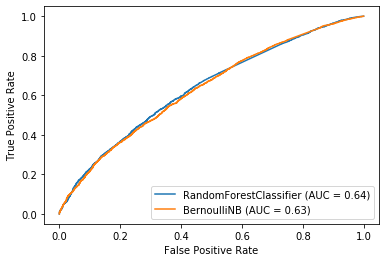

In [29]:
fig, ax = plt.subplots(1)
plot_roc_curve(model, x_test, y_test, ax = ax)
plot_roc_curve(nb, x_test, y_test, ax = ax)

In [19]:
num_features = range(1, 4)
accuracies = []

for n in num_features:
    tot = 0
    for i in range(5):
        rf = RandomForestClassifier(n_jobs=-1, random_state  = 1, max_depth = 4, n_estimators=100, max_features=n, class_weight = 'balanced')
        rf.fit(x_train, y_train)
        tot += rf.score(x_test, y_test)
    accuracies.append(tot / 5)
fig, ax = plt.subplots()
ax.plot(num_features, accuracies)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title('Accuracy vs Num Features')



KeyboardInterrupt: 

In [34]:
get_scores(RandomForestClassifier, X_train, X_test, y_train, y_test, max_features = 5)

(0.5715616572689385, 0.4719222462203024, 0.25772587874498704)

(For imbalanced data, the argument changes; accuracy here is practically useless, and you should consider precision, recall, and the confusion matrix instead).

## New Model Bernoulli Naive Bayes

In [23]:
weight = y_train 
weight = np.where(weight == 1, weight/2, weight+2)
weight_t = y_test
weight_t = np.where(weight_t == 1, weight_t/2, weight_t+2)

In [24]:
nb = BernoulliNB()
nb.fit(x_train, y_train, sample_weight = weight)

BernoulliNB()

In [25]:
y_pred = nb.predict(x_test)

In [26]:
nb.score(x_test, y_test), \
    precision_score(y_test, y_pred), \
           recall_score(y_test, y_pred)

(0.8028300006643194, 0.943341753879466, 0.8387464793753788)

In [27]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(644, 1413, 4523, 23526)

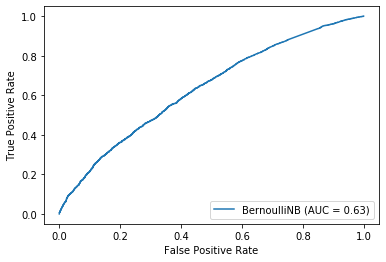

In [28]:
plot_roc_curve(nb, x_test, y_test, sample_weight = weight_t)

## Cross Valedate Test

In [123]:
sk_train_neg_rmses = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error')
sk_train_rmse = np.mean(sk_train_neg_rmses)*(-1)

In [125]:
sk_test_neg_rmses = cross_val_score(model, X_test, y_test, scoring='neg_root_mean_squared_error')
sk_test_rmse = np.mean(sk_test_neg_rmses)*(-1)

In [126]:
print(f'Sklearn train RMSE: {sk_train_rmse:0.03f}')
print(f'Sklearn test RMSE: {sk_test_rmse:0.03f}')

Sklearn train RMSE: 0.149
Sklearn test RMSE: 0.150


In [ ]:
def plot_error_vs_splitsize(X_train, y_train, n_obs_arr):
    cv_train_errors = []
    cv_test_errors = []
    for n_obs in n_obs_arr.astype('int'):
        train_error = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error')

        test_error = cross_val_score(model, X_test, y_test, scoring='neg_root_mean_squared_error')
        cv_train_errors.append(np.mean(train_error)*-1)
        cv_test_errors.append(np.mean(test_error)*-1)
    
    plt.close('all')
    
    fig, ax = plt.subplots()
    ax.plot(n_obs_arr, cv_train_errors, label='Train')
    ax.plot(n_obs_arr, cv_test_errors, label='Test')
    ax.set_xlabel('Training set size')
    ax.set_ylabel('RMSE')
    ax.legend()
    plt.show()

    
    
train_lens = np.linspace(10,100, 25)
plot_error_vs_splitsize(X_train, y_train, n_obs_arr=train_lens )


In [ ]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
# (tn, fp, fn, tp)
# (0, 2, 1, 1)

### ADD Balanced and increated models